Author :- Nishant Medpalwar

Detection of the Parkinson's Disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from sklearn.preprocessing import StandardScaler

Importing the DataSet

In [22]:
df= pd.read_csv('Parkinsson disease.csv')

In [23]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [24]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [25]:
print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [26]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [27]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [28]:
x=df.drop(columns=['name','status'],axis=1)

In [29]:
y=df['status']

In [30]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

Data Visualization

In [32]:
import seaborn as sns

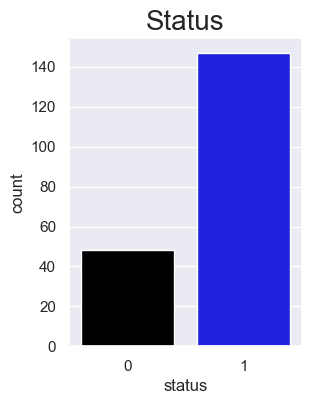

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(3,4))
sns.set(style="darkgrid")
sns.countplot(x="status",data=data,palette=["Black","Blue"])
plt.title("Status",size=20)
plt.show()

Training and Testing

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
sc = StandardScaler()

In [37]:
x_train = sc.fit_transform(x_train)

In [38]:
X_test = sc.transform(x_test)

In [39]:
x_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

In [40]:
x_test

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
10,88.333,112.240,84.072,0.00505,0.000060,0.00254,0.00330,0.00763,0.02143,0.197,...,0.01892,0.03237,0.01166,21.118,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
79,100.770,115.697,85.545,0.01038,0.000100,0.00622,0.00576,0.01865,0.03121,0.361,...,0.02139,0.05320,0.02220,19.200,0.594387,0.790117,-4.913885,0.265699,2.398422,0.277948
164,102.273,142.830,85.902,0.00907,0.000090,0.00493,0.00461,0.01480,0.02814,0.272,...,0.02073,0.04736,0.03882,18.447,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233
142,198.458,219.290,148.691,0.00376,0.000020,0.00182,0.00215,0.00546,0.03527,0.297,...,0.02530,0.06165,0.01728,18.702,0.606273,0.661735,-5.585259,0.310746,2.465528,0.209863
186,116.556,592.030,86.228,0.00496,0.000040,0.00254,0.00263,0.00762,0.01660,0.154,...,0.01491,0.02460,0.01397,23.958,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
133,118.747,123.723,109.836,0.00331,0.000030,0.00168,0.00171,0.00504,0.01043,0.099,...,0.00903,0.01471,0.00504,25.619,0.482296,0.723096,-6.448134,0.178713,2.034827,0.141422
35,201.464,210.565,195.708,0.00198,0.000010,0.00105,0.00115,0.00314,0.01194,0.107,...,0.00957,0.01758,0.00135,31.732,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
137,113.166,130.270,100.673,0.00502,0.000040,0.00257,0.00312,0.00772,0.05279,0.476,...,0.04134,0.08689,0.03690,16.747,0.625362,0.708617,-4.654894,0.304107,2.672362,0.274387
25,104.400,206.002,77.968,0.00633,0.000060,0.00316,0.00375,0.00948,0.03767,0.381,...,0.03780,0.05197,0.02887,22.066,0.522746,0.737948,-5.571843,0.236853,2.846369,0.219514
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [41]:
x_train.shape

(156, 22)

In [42]:
x_test.shape

(39, 22)

In [43]:
from sklearn import svm

In [44]:
model = svm.SVC(kernel = 'linear')

In [45]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [47]:
x_train_pred = model.predict(x_train)

In [48]:
train_data_acc = accuracy_score(y_train, x_train_pred)

In [49]:
print('acc of training data :', train_data_acc)

acc of training data : 0.8846153846153846


In [50]:
x_test_pred = model.predict(x_test)

c:\Users\nisha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [51]:
test_data_acc = accuracy_score( y_test,x_test_pred )

In [52]:
print('acc of testing data : ' ,test_data_acc)

acc of testing data :  0.20512820512820512


In [53]:
input_data=(139.173,179.139,76.556,0.0039,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,0.00728,0.00932,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889)

input_data_np = np.asarray(input_data)

input_data_re = input_data_np.reshape(1, -1)

s_data = sc.transform(input_data_re)

pred = model.predict(s_data)

if(pred[0]==0):
    print("Negative,No Parkinson's Found")
else:
    print("Positive, Parkinson's Found" )

Positive, Parkinson's Found


c:\Users\nisha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

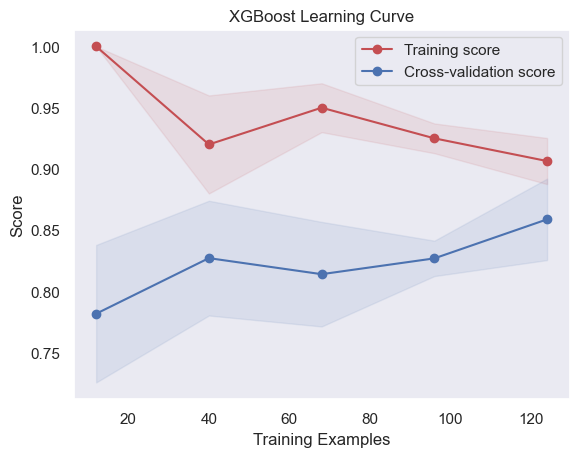

In [55]:
g=plot_learning_curve(model, "XGBoost Learning Curve",x_train,y_train)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model= rfc.fit(x_train,y_train)
rfc_predict = model.predict(x_test)
print(accuracy_score(rfc_predict,y_test))

0.7948717948717948


c:\Users\nisha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


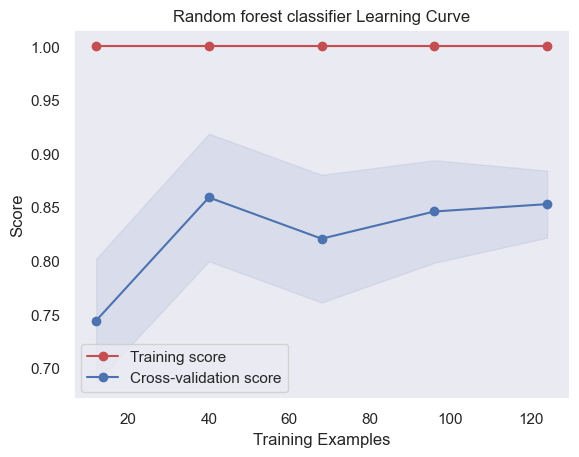

In [57]:
g=plot_learning_curve(model, "Random forest classifier Learning Curve",x_train,y_train)